In [1]:
#2.6

In [5]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
%run ../utilities.ipynb

In [4]:
input_file = 'data_multivar_nb.txt'

In [6]:
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [7]:
classifier = GaussianNB()

In [8]:
classifier.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
y_pred = classifier.predict(X)

In [10]:
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]
print("Accuracy of Naive Bayes classifier = ", round(accuracy, 2), "%")

Accuracy of Naive Bayes classifier =  99.75 %


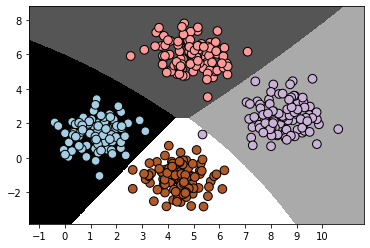

In [11]:
visualize_classifier(classifier, X, y)

In [12]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                   test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

In [13]:
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

Accuracy of the new classifier = 100.0 %


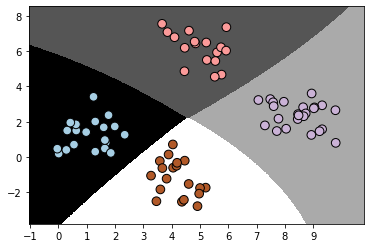

In [14]:
visualize_classifier(classifier_new, X_test, y_test)

In [16]:
num_folds = 3
accuracy_values = model_selection.cross_val_score(classifier,
                                                 X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")

Accuracy: 99.75%


In [18]:
precision_values = model_selection.cross_val_score(classifier,
                                                 X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")

Precision: 99.76%


In [19]:
recall_values = model_selection.cross_val_score(classifier,
                                               X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")

Recall: 99.75%


In [20]:
f1_values = model_selection.cross_val_score(classifier,
                                           X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")

F1: 99.75%
